<a href="https://colab.research.google.com/github/AidanaBaimakishova/Test/blob/main/%D0%9F%D1%80%D0%BE%D0%B1%D0%BD%D0%B8%D0%BA6%22%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A3%D0%A0%D0%90%D0%9B_YOLOv8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# для исправления возникающей ошибки "A UTF-8 locale is required. Got ANSI_X3.4-1968"
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# проверка подключения GPU
!nvidia-smi

Sat Mar 16 10:35:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# установка YOLOv8
!pip install ultralytics==8.1.19


In [3]:
# скачивание датасета в папку Collab с https://universe.roboflow.com/search
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IVzafAeaBigTIc6pm0Fj")
project = rf.workspace("ganavi-c-n-ex3ky").project("safety_goggles")
version = project.version(1)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.19, to fix: `pip install ultralytics==8.0.196`


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Путь к вашему zip-файлу на Google Диске
zip_file_path = '/content/drive/MyDrive/dataset/all.zip'

# Путь для распаковки файлов
extract_path = '/content/extracted_folder/'

# Распаковываем zip-архив
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Выводим список файлов в распакованной папке
extracted_files = os.listdir(extract_path)
print("Extracted files:")
for file in extracted_files:
    print(file)


Extracted files:
all


In [7]:
from IPython import display
from IPython.display import Image
display.clear_output()

import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


In [8]:
# загрузка модели YOLOv8
model = YOLO("yolov8s.yaml")
#model = YOLO("yolov8n.pt")
#model = YOLO("yolov8s.pt")

In [9]:
# обучение модели
# data_path = "/content/smoke-detection-1/data.yaml" # курильщики
data_path = "/content/safety_goggles-1/data.yaml" # защитные очки
results = model.train(data=data_path, epochs=25, pretrained=True, iou=0.5, visualize=True, patience=0)

# оценка модели
results = model.val()

New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/safety_goggles-1/data.yaml, epochs=25, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=True, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 122MB/s]


AMP: checks passed ✅


train: Scanning /content/safety_goggles-1/train/labels... 687 images, 0 backgrounds, 0 corrupt: 100%|██████████| 687/687 [00:00<00:00, 1281.35it/s]

train: New cache created: /content/safety_goggles-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/safety_goggles-1/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 861.09it/s]

val: New cache created: /content/safety_goggles-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      4.07G      3.432      3.804      4.171         45        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         60         77    0.00705      0.623    0.00979    0.00224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.16G      3.302       3.64      3.954         32        640: 100%|██████████| 43/43 [00:16<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         60         77     0.0051      0.416    0.00511    0.00111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.15G      2.989      3.517      3.618         37        640: 100%|██████████| 43/43 [00:16<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         60         77     0.0412     0.0909     0.0227    0.00499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.14G      2.812      3.506      3.464         29        640: 100%|██████████| 43/43 [00:15<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         60         77     0.0193      0.117     0.0125     0.0028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.14G      2.692       3.39      3.287         39        640: 100%|██████████| 43/43 [00:16<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         60         77    0.00614      0.727     0.0273    0.00559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       4.3G      2.685      3.367      3.237         36        640: 100%|██████████| 43/43 [00:16<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         60         77      0.057     0.0779     0.0741      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.29G      2.645      3.362      3.179         34        640: 100%|██████████| 43/43 [00:16<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         60         77      0.141      0.117      0.055     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.14G        2.6      3.297      3.122         29        640: 100%|██████████| 43/43 [00:16<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         60         77       0.18     0.0649     0.0413     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      4.14G      2.538      3.241      3.051         34        640: 100%|██████████| 43/43 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         60         77      0.136      0.429      0.143     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.13G      2.521      3.182      3.017         30        640: 100%|██████████| 43/43 [00:16<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         60         77      0.122      0.143      0.065     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.13G      2.494      3.089      2.948         31        640: 100%|██████████| 43/43 [00:16<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         60         77      0.329      0.313      0.297     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.15G      2.447      2.999      2.914         40        640: 100%|██████████| 43/43 [00:16<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         60         77      0.343      0.312      0.245     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.13G      2.449      2.956      2.883         31        640: 100%|██████████| 43/43 [00:16<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60         77      0.287       0.26      0.205     0.0492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.13G       2.42      2.909      2.869         38        640: 100%|██████████| 43/43 [00:16<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         60         77       0.42      0.481      0.399      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.13G      2.405      2.846      2.816         35        640: 100%|██████████| 43/43 [00:16<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         60         77       0.39      0.474      0.426      0.138


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      4.14G      2.254      2.744      2.841         20        640: 100%|██████████| 43/43 [00:18<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         60         77      0.506      0.468      0.475      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      4.14G      2.188      2.546      2.834         18        640: 100%|██████████| 43/43 [00:16<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         60         77      0.561      0.636      0.568      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      4.14G      2.137      2.499      2.786         17        640: 100%|██████████| 43/43 [00:15<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         60         77      0.613      0.558      0.544       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      4.13G      2.083      2.414      2.725         15        640: 100%|██████████| 43/43 [00:15<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         60         77      0.637       0.61      0.653      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      4.14G      2.058      2.327      2.672         22        640: 100%|██████████| 43/43 [00:15<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60         77      0.799       0.67      0.776      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      4.14G      2.061      2.247      2.668         28        640: 100%|██████████| 43/43 [00:15<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60         77      0.603      0.584       0.67      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      4.14G      1.993        2.2      2.647         17        640: 100%|██████████| 43/43 [00:15<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         60         77      0.796      0.688      0.785      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      4.29G      2.024      2.132      2.634         21        640: 100%|██████████| 43/43 [00:15<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         60         77      0.697      0.748      0.788       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      4.14G      1.965      2.137      2.617         22        640: 100%|██████████| 43/43 [00:16<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         60         77      0.784      0.766       0.84      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      4.14G      1.935      2.045      2.601         15        640: 100%|██████████| 43/43 [00:15<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         60         77      0.858      0.766      0.878      0.409



25 epochs completed in 0.134 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]


                   all         60         77      0.849      0.766      0.878      0.408
Speed: 0.3ms preprocess, 4.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/safety_goggles-1/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


                   all         60         77      0.858      0.766      0.878      0.411
Speed: 0.5ms preprocess, 39.4ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/train2


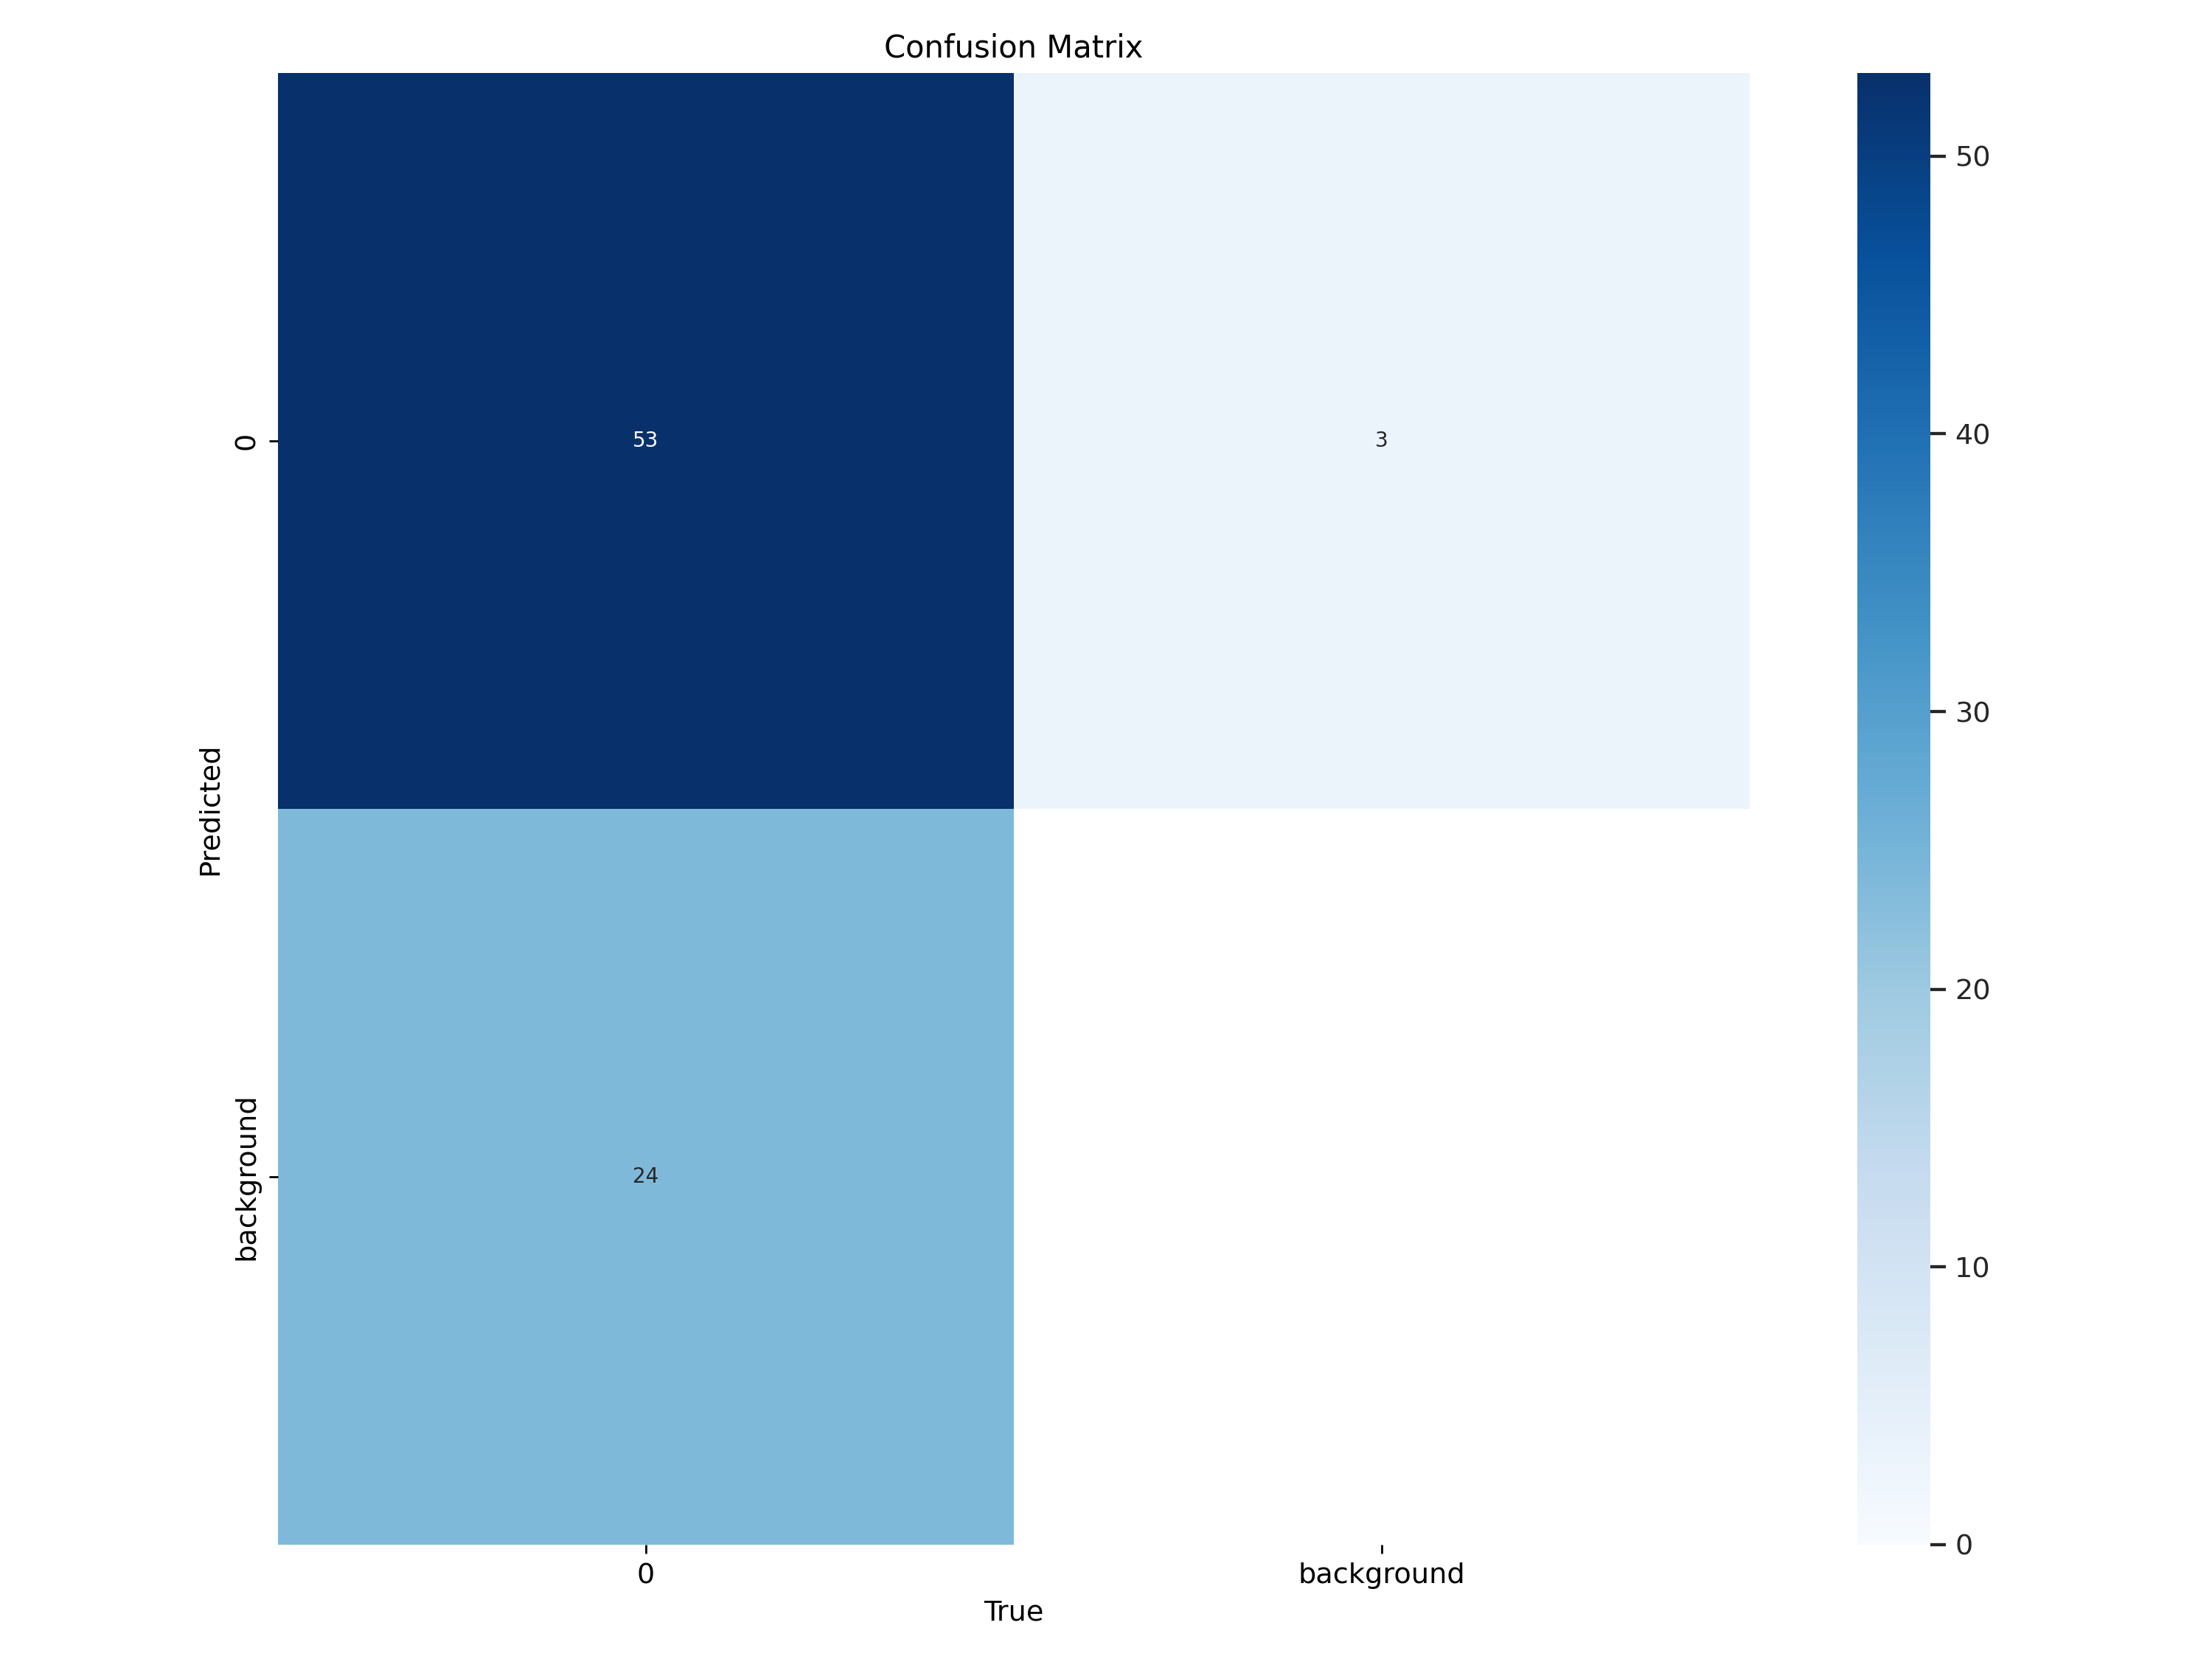

In [10]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

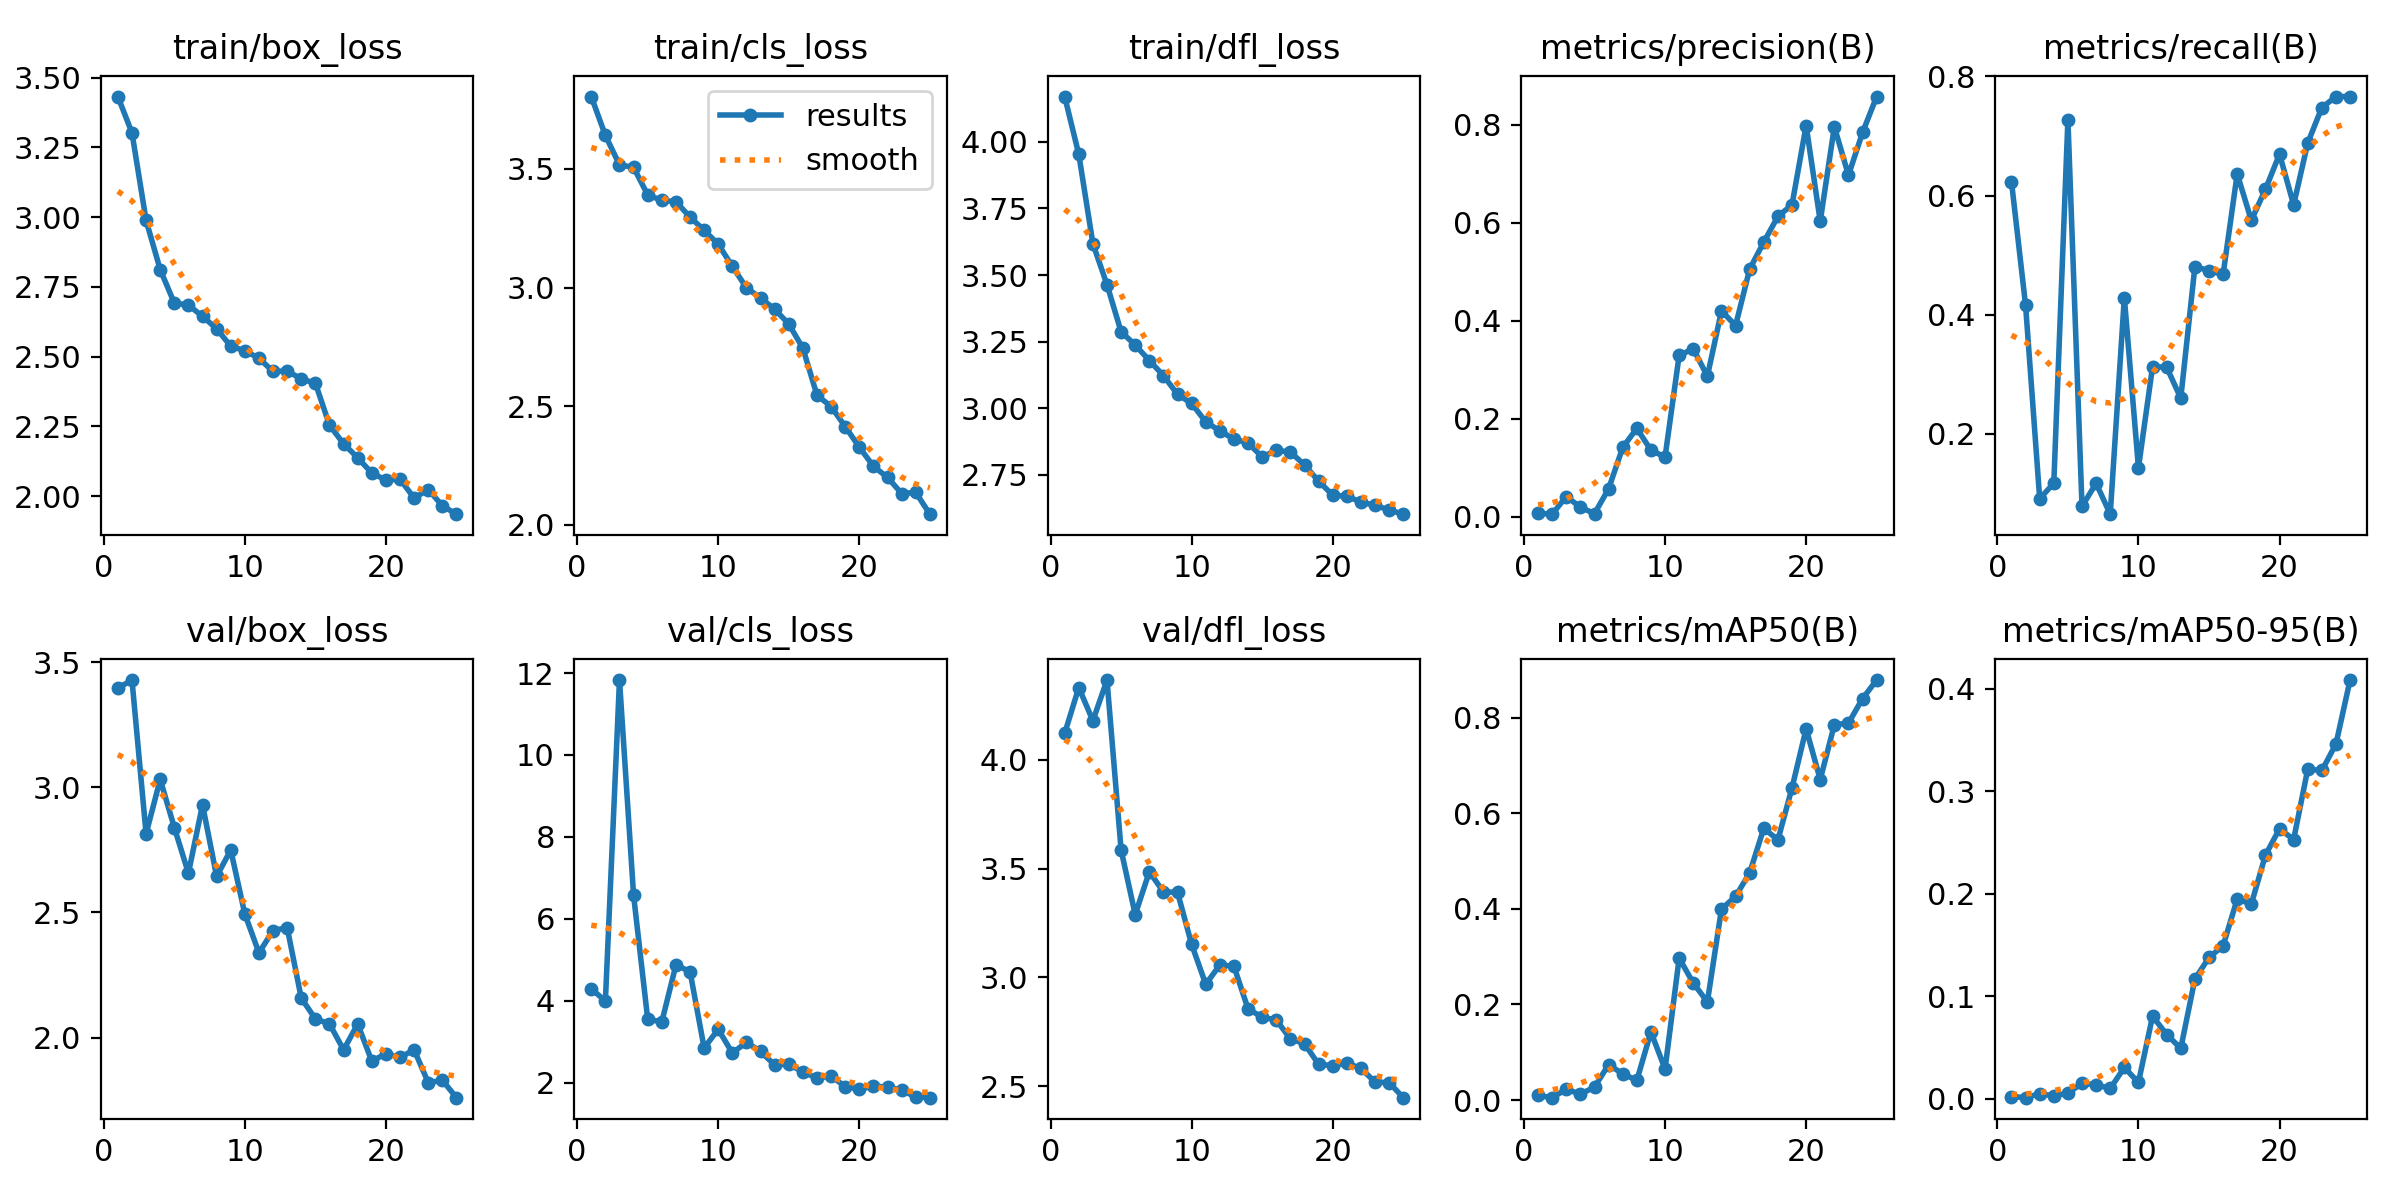

In [11]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

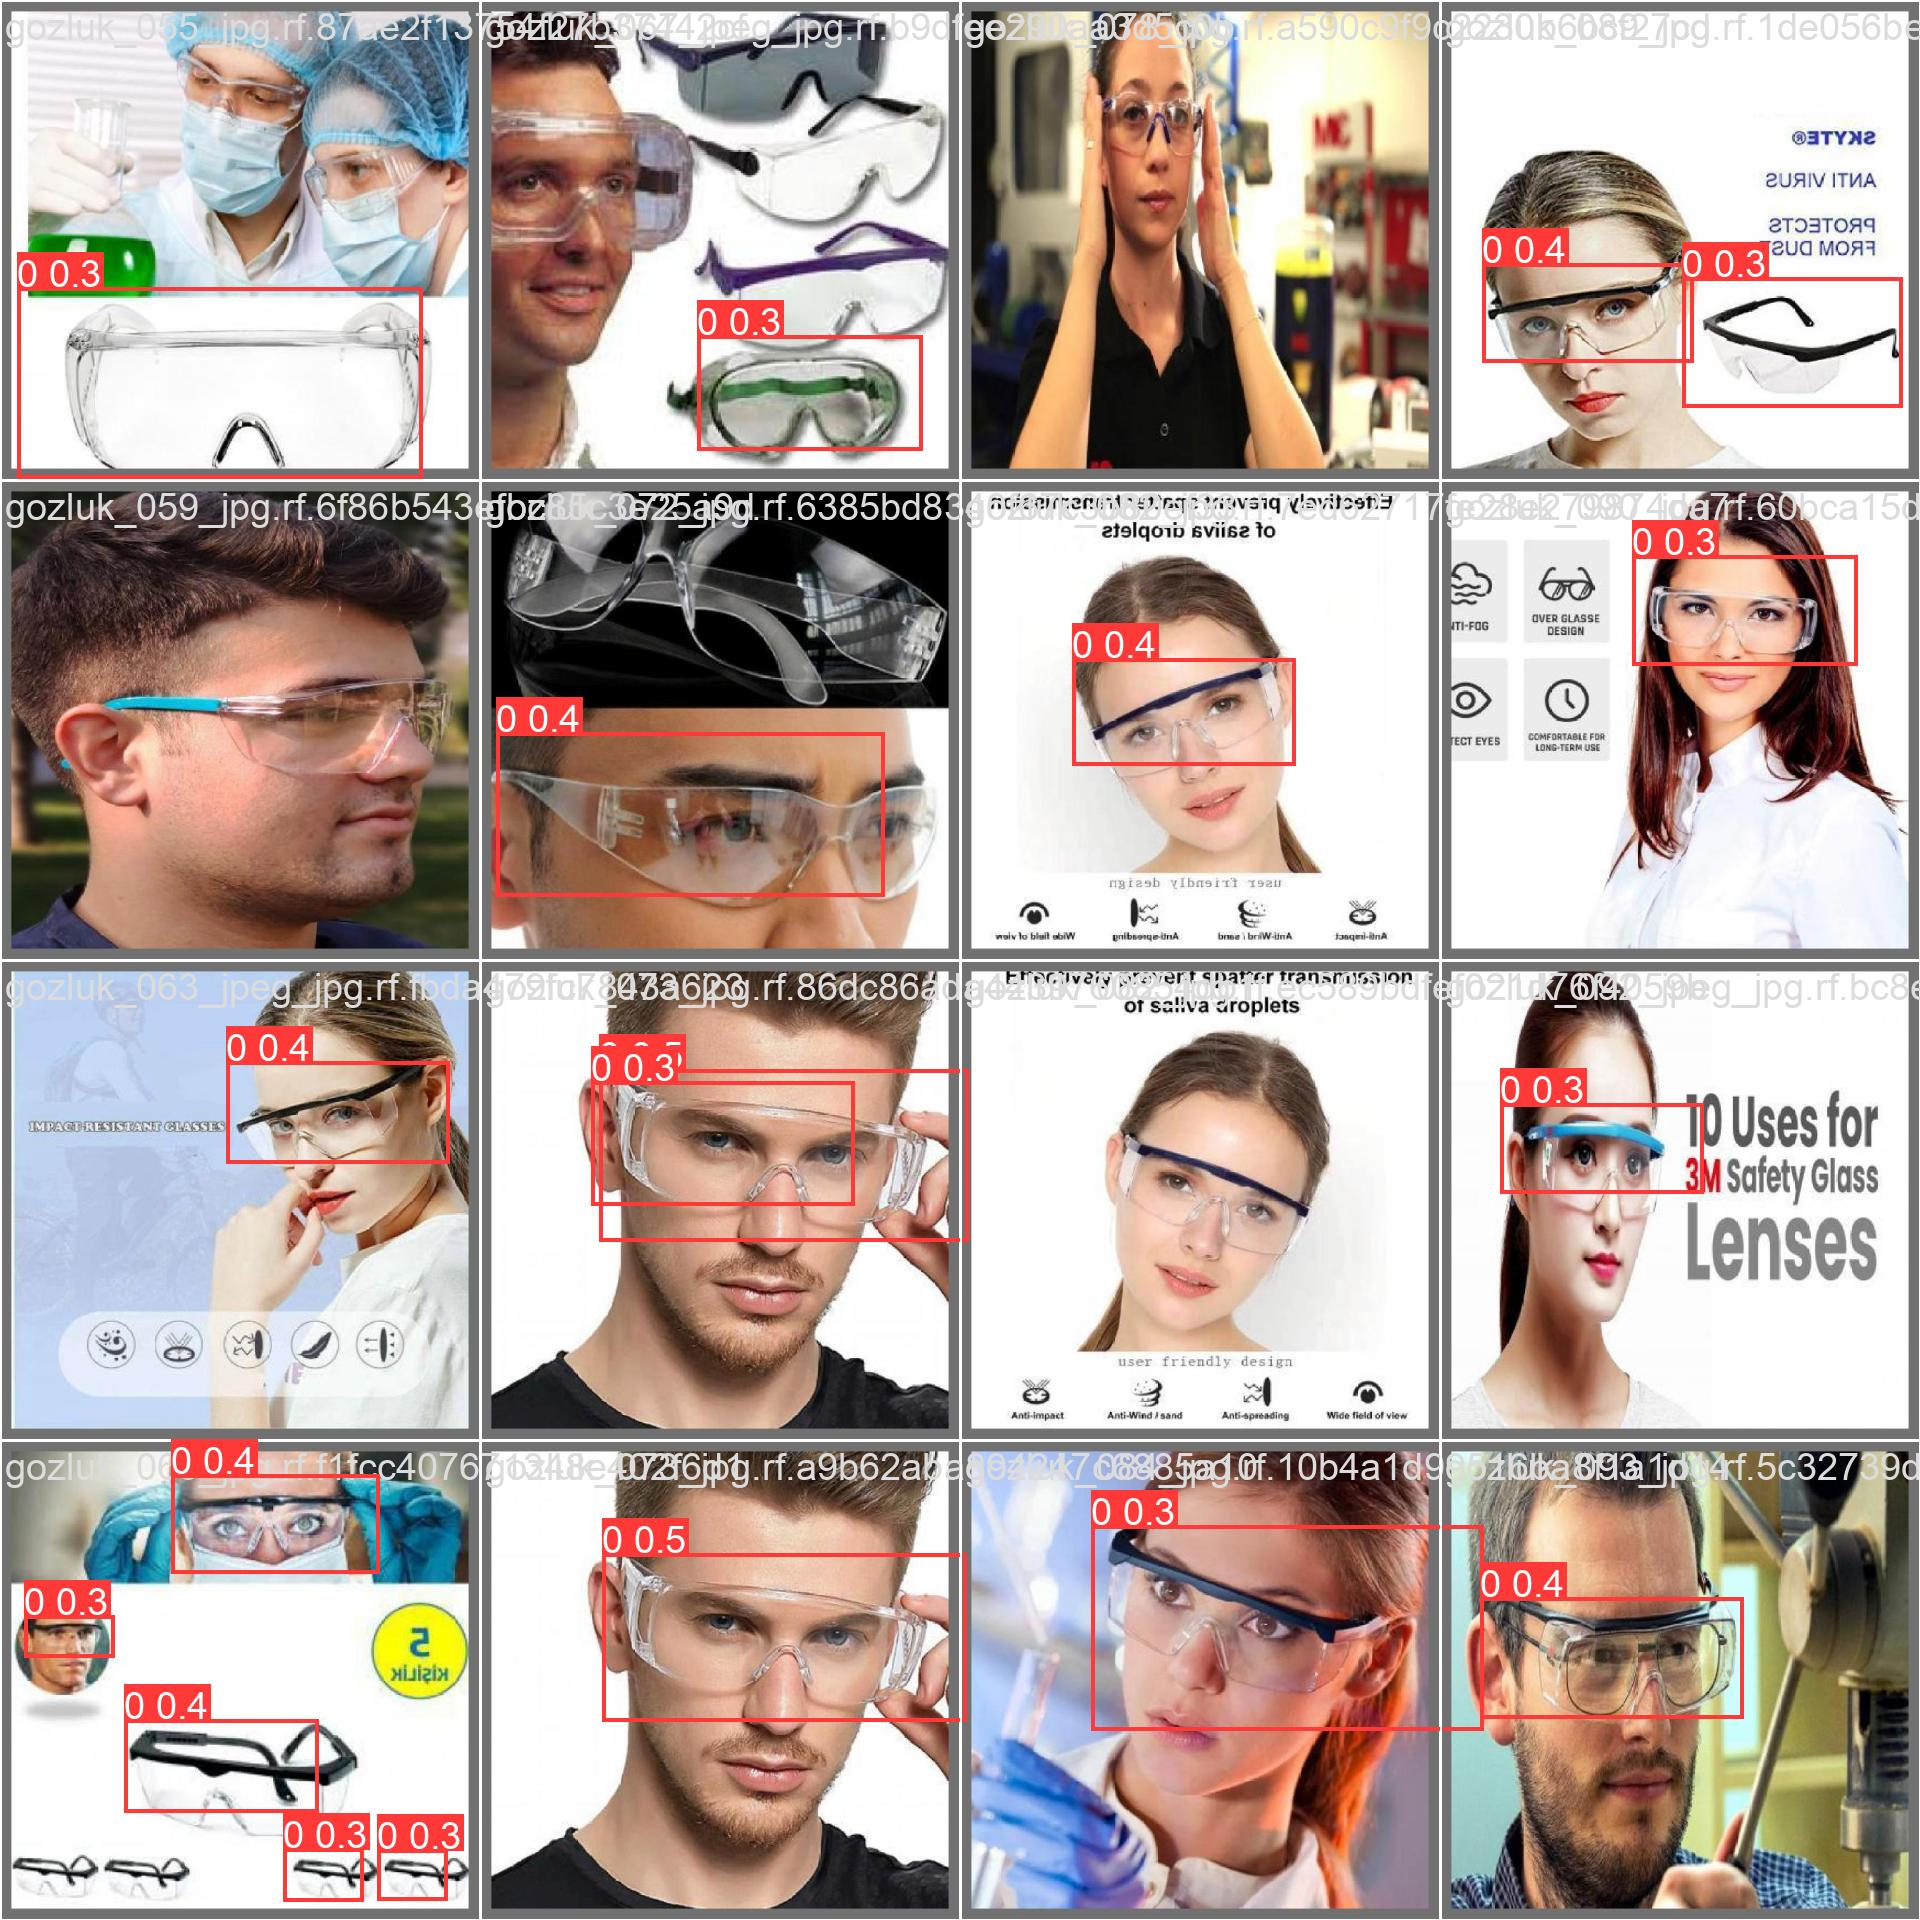

In [12]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

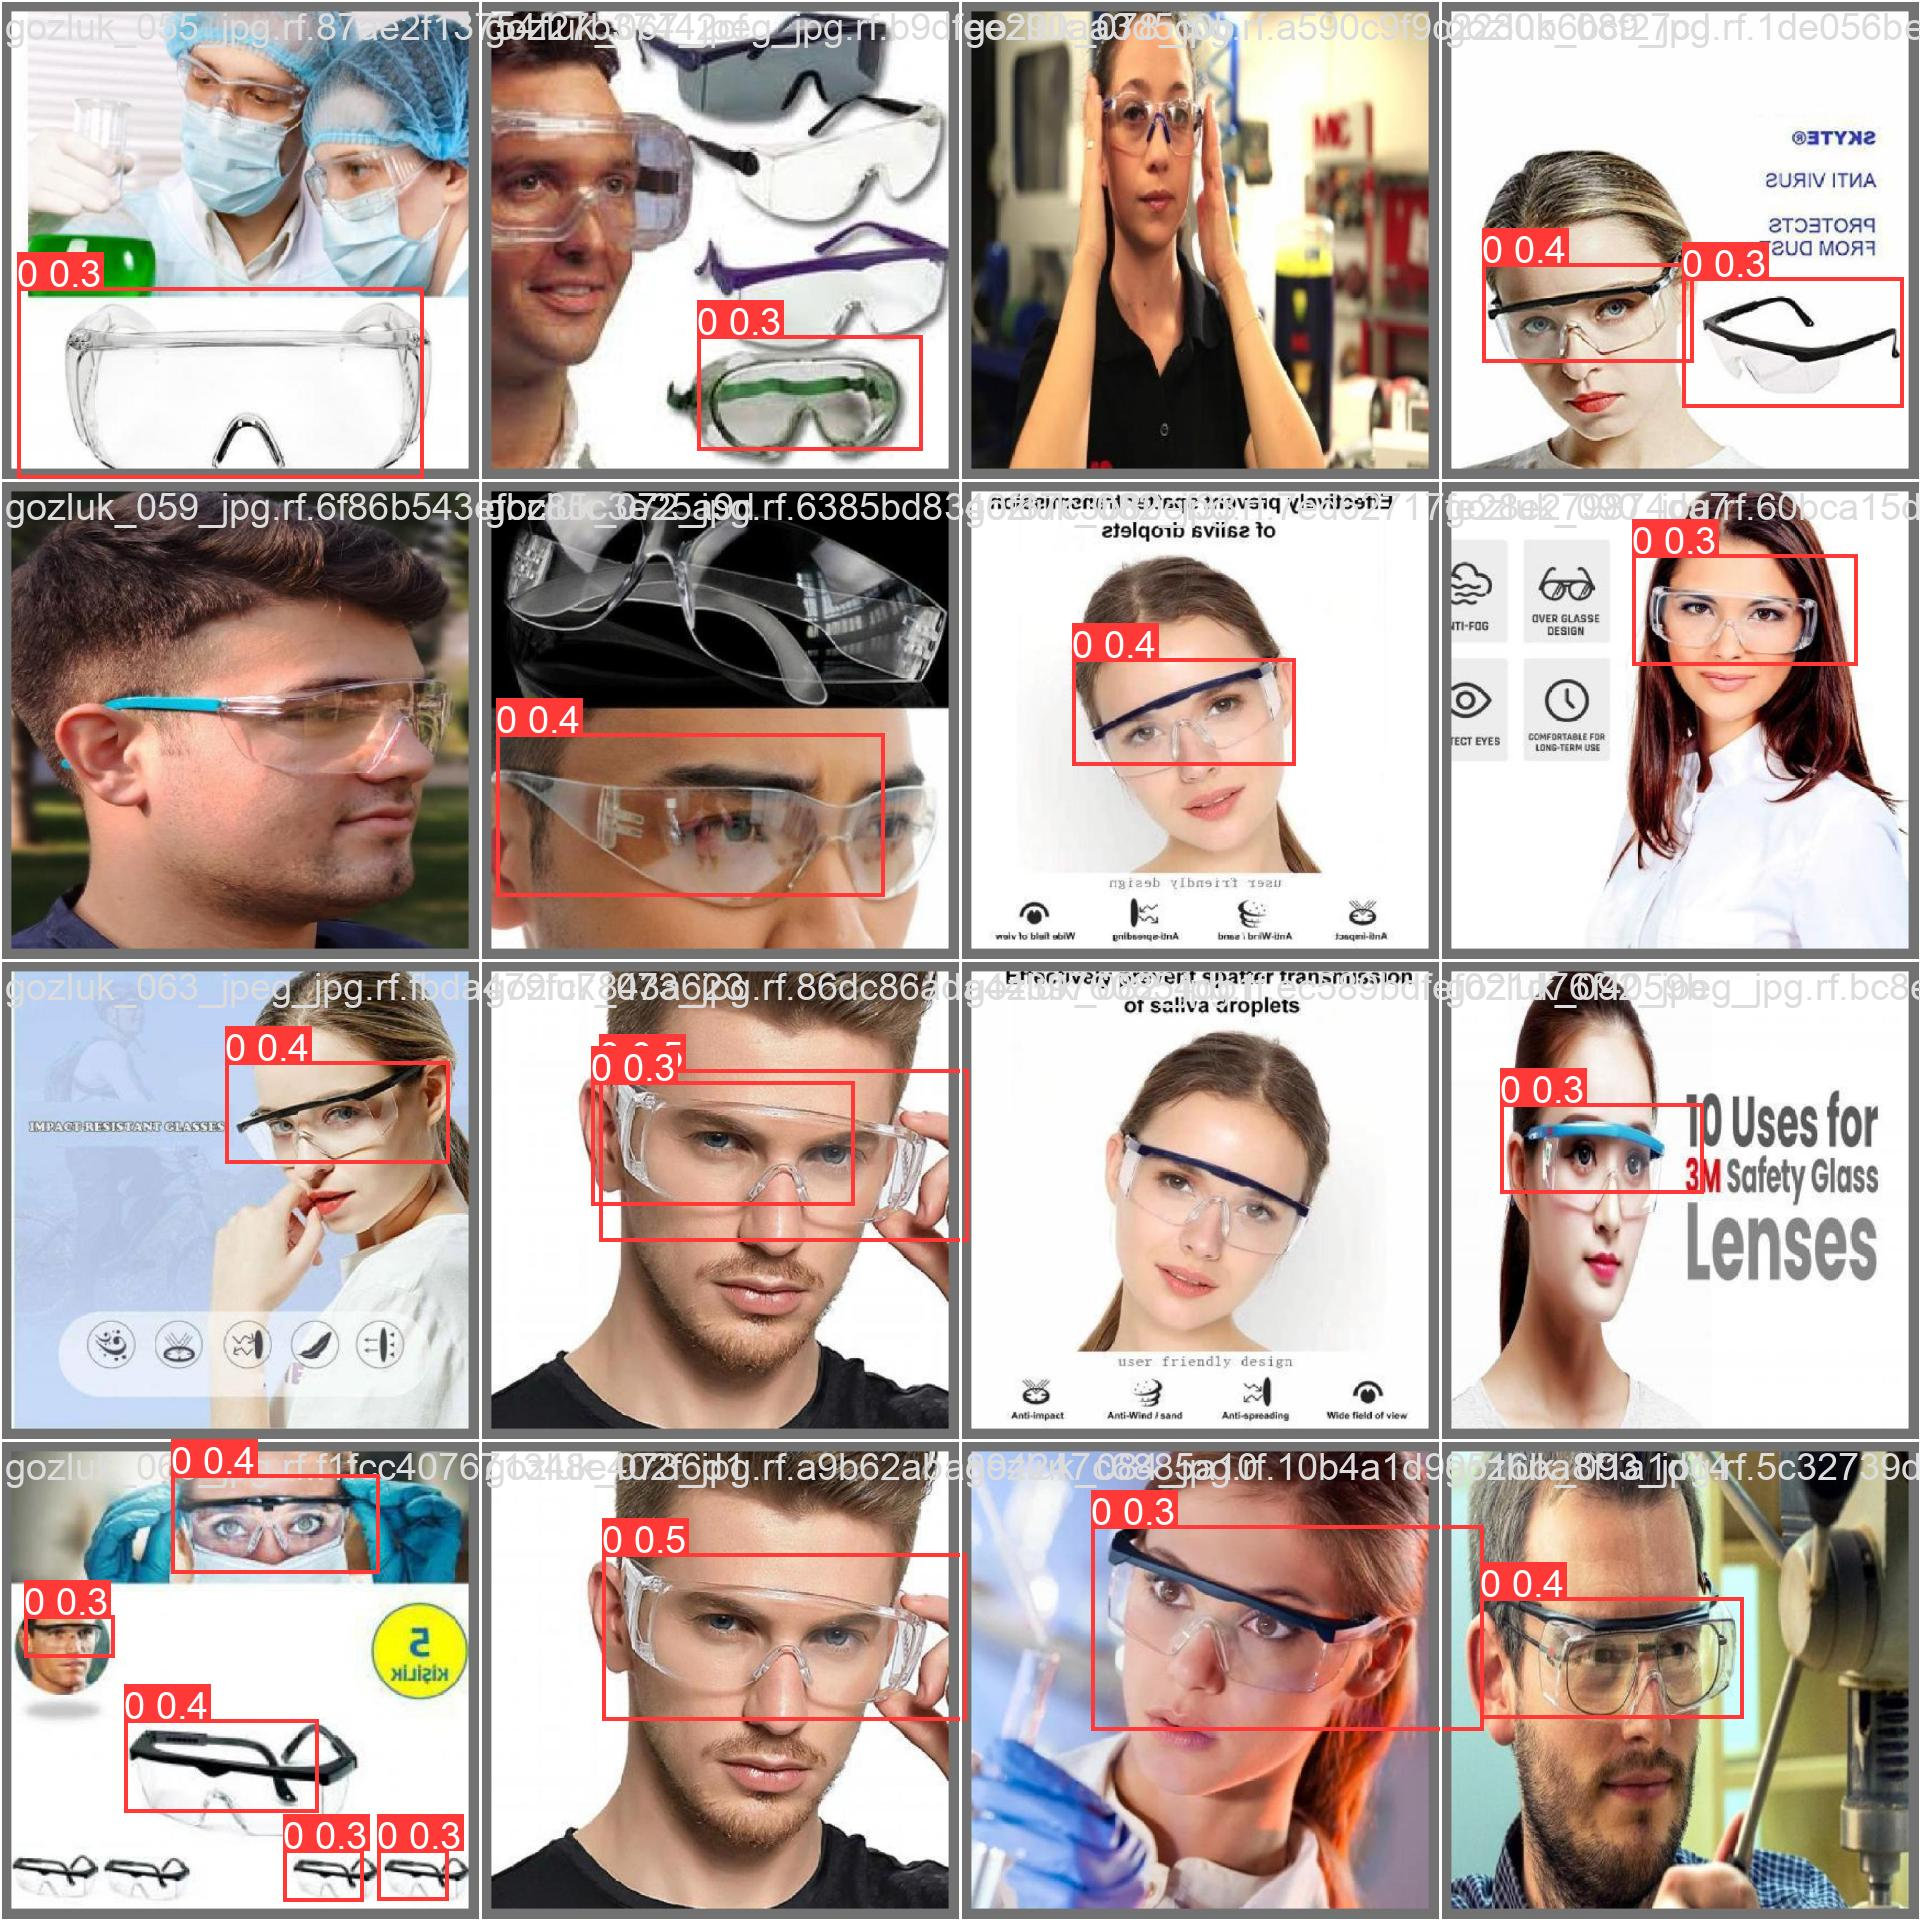

In [13]:
Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

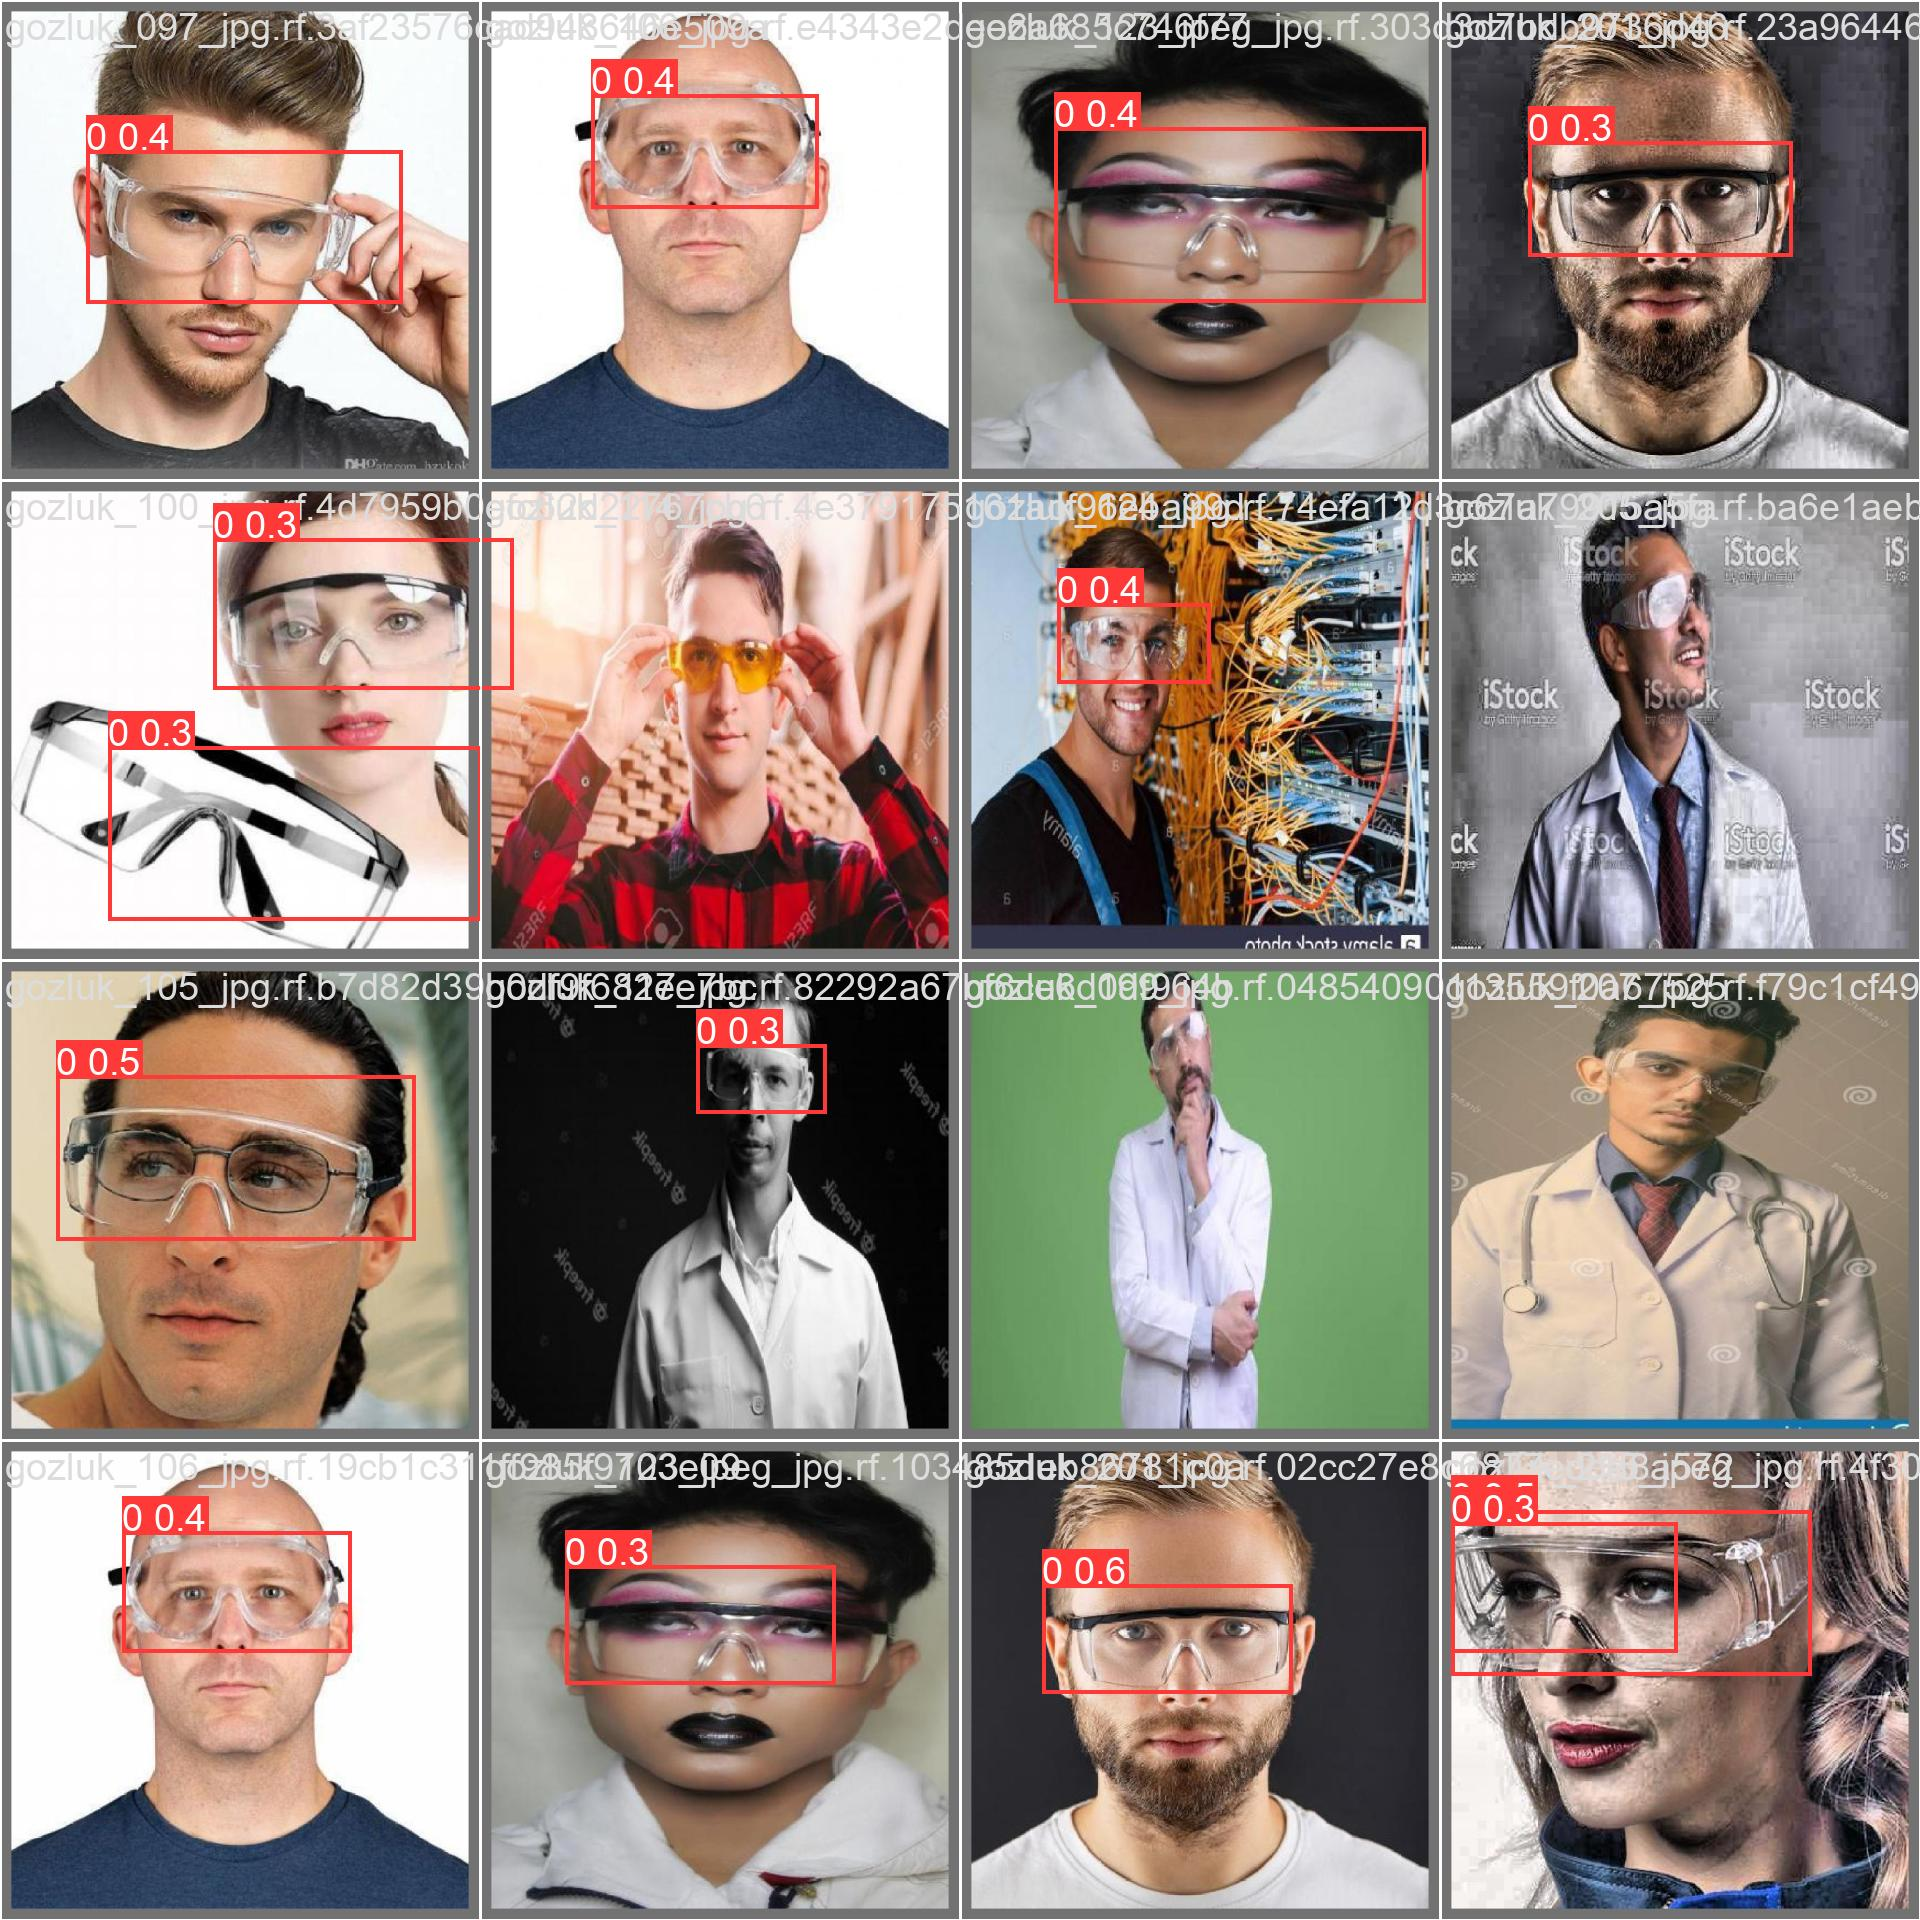

In [14]:
Image(filename=f'/content/runs/detect/train2/val_batch1_pred.jpg', width=700)

In [15]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=data_path

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 568, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 503, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py", line 145, in __call__
    raise FileNotFoundError(emojis(f"Dataset '{self.args.data}' for task={self.args.task} not found ❌"))
FileNotFoundError: Dataset 'data_path' for task=detect not found ❌


In [16]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/Helmet-1/test/images save=True

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 568, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 429, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 213, in predict_cli
    for _ in gen:  # noqa, running CLI inference without accumulating any outputs (do not modify)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    response = gen.send(No

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")